In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from IPython.display import display, IFrame
import branca
import ast

In [17]:
import plotly
import plotly.express as px
import pandas as pd

In [18]:
df_pop = pd.read_csv('../pop.csv')
df_ids = pd.read_csv('../agents.csv')

In [19]:
# def heat_map(path, day):
#     df_pop = pd.read_csv('../pop.csv')
#     df_ids = pd.read_csv('../agents.csv')
#     df_ids['lat'] = df_ids['lat'].round(2)
#     df_ids['long'] = df_ids['long'].round(2)

#     df_res = pd.read_csv(path)
#     s = df_res['INFECTED AGENTS'][day]
#     inf = ast.literal_eval(s)
#     city, lat, long = [], [], []
#     df_t = pd.DataFrame()
#     for idx in inf:
#         lat.append(df_ids.iloc[idx[0]]['lat'])
#         long.append(df_ids.iloc[idx[0]]['long'])
#         city.append(df_ids.iloc[idx[0]]['city_id'])
#     df_t['lat'] = lat
#     df_t['long'] = long
#     df_t['city_id'] = city     
#     x = df_t.groupby(['lat', 'long'])['city_id'].count()

#     m = folium.Map(location=[df_pop['Lat'].mean(), df_pop['Long'].mean()], zoom_start=10)
#     heat_data = [[i[0], i[1], row] for i, row in x.iteritems()]
#     HeatMap(heat_data, radius=15).add_to(m)
#     # Save map to HTML and display using IFrame
#     m.save("map.html")
#     display(IFrame('map.html', width=400, height=500))
#     return

In [20]:
def heat_map_folium(path, day):
    df_pop = pd.read_csv('../pop.csv')
    df_ids = pd.read_csv('../agents.csv')
    df_ids['lat'] = df_ids['lat'].round(3)
    df_ids['long'] = df_ids['long'].round(3)

    df_res = pd.read_csv(path)
    l = [-1]*100000
    for i, string in enumerate(df_res['INFECTED AGENTS']):
        inf = ast.literal_eval(string)
        for idx in inf:
            if l[idx[0]] == -1:
                l[idx[0]] = i
    df_ids['Day'] = l
    df_ids = df_ids[df_ids['Day']>=0]
    df_ids = df_ids[df_ids['Day']<=day]

    x = df_ids.groupby(['lat', 'long']).count()['city_id']

    m = folium.Map(location=[df_pop['Lat'].mean(), df_pop['Long'].mean()], zoom_start=10)
    heat_data = [[i[0], i[1], row] for i, row in x.iteritems()]
    # HeatMap(data, ).add_to(m)
    HeatMap(heat_data, radius=15).add_to(m)
    # Save map to HTML and display using IFrame
    m.save("map.html")
    display(IFrame('map.html', width=400, height=500))
    return

In [21]:
# Create a color map based on the day
def day_map(path):
    df_ids = pd.read_csv('../agents.csv')
    df_res = pd.read_csv(path)
    l = [-1]*100000
    for i, string in enumerate(df_res['INFECTED AGENTS']):
        inf = ast.literal_eval(string)
        for idx in inf:
            if l[idx[0]] == -1:
                l[idx[0]] = i
    df_ids['Day'] = l
    df_ids = df_ids[df_ids['Day']>=0]

    min_day, max_day = 0, 180
    colors = ['blue', 'cyan', 'yellow', 'red']
    colormap = branca.colormap.LinearColormap(colors=colors, vmin=min_day, vmax=max_day, caption='Day')
    m = folium.Map(location=[df_pop['Lat'].mean(), df_pop['Long'].mean()], zoom_start=10)
    for _, row in df_ids.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=1, fill=True, fill_opacity=0.6,
            color=colormap(row['Day'])
        ).add_to(m)
    m.add_child(colormap)
    # Save map to HTML and display using IFrame
    m.save("map.html")
    display(IFrame('map.html', width=400, height=500))
    return

In [22]:
plotly.express.set_mapbox_access_token('pk.eyJ1IjoiZ2F1cmlpIiwiYSI6ImNsbjVsd3MxdzA3aHEybXF1NnkzdnFzY3UifQ.-W3aQQK906PhMEqSRNKu3g')

In [23]:
def plotly_heat_map(path, day):
    df_pop = pd.read_csv('../pop.csv')
    df_ids = pd.read_csv('../agents.csv')
    df_ids['lat'] = df_ids['lat'].round(2)
    df_ids['long'] = df_ids['long'].round(2)

    df_res = pd.read_csv(path)
    l = [-1]*100000
    for i, string in enumerate(df_res['INFECTED AGENTS']):
        inf = ast.literal_eval(string)
        for idx in inf:
            if l[idx[0]] == -1:
                l[idx[0]] = i
    df_ids['Day'] = l
    df_ids = df_ids[df_ids['Day']>=0]
    df_ids = df_ids[df_ids['Day']<=day]

    x = df_ids.groupby(['lat', 'long']).count()['city_id']
    x = list(zip(x.index, x.values))
    x = [[a, -b, c] for ((a, b), c) in x]
    df = pd.DataFrame(x)

    fig = px.density_mapbox(df, lat=0, lon=1, z=2, 
                            radius=30, center=dict(lat=df_pop['Lat'].mean(), lon=-df_pop['Long'].mean()), 
                            zoom=8.3, mapbox_style="basic",  opacity = 1, range_color=[0, 520], color_continuous_scale='rdylbu_r')
    # Hide the colorbar
    for trace in fig.data:
        trace.showscale = False
    fig.update_layout(width=450, height=500)
    # fig.update_traces(showscale=False)
    fig.show()

# Initial setup

In [177]:
# import pandas as pd
# import numpy as np
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Sample city population data
# city_population = {'City': ['Seattle', 'Bellevue', 'Redmond', 'Kirkland'],
#                    '../population': [744955, 141745, 66475, 86497]}

# # Convert city population data to a Pandas DataFrame
# df = pd.DataFrame(city_population)

# # Calculate the number of agents per city based on population
# df['../agents'] = df['../population'] / df['../population'].sum() * 100000
# df['../agents'] = df['../agents'].astype(int)

# # Randomly distribute the remaining agents
# remaining_agents = 100000 - df['../agents'].sum()
# remaining_agents_cities = np.random.choice(df.index, remaining_agents, replace=True)
# df.loc[remaining_agents_cities, '../agents'] += 1

# # Create a GeoDataFrame with city coordinates
# city_coordinates = {'City': ['Seattle', 'Bellevue', 'Redmond', 'Kirkland'],
#                     'Latitude': [47.6062, 47.6101, 47.6742, 47.6907],
#                     'Longitude': [-122.3321, -122.2015, -122.1206, -122.2035]}

# gdf = gpd.GeoDataFrame(city_coordinates, geometry=gpd.points_from_xy(city_coordinates['Longitude'], city_coordinates['Latitude']))
# gdf = gdf.set_index('City')

# # Merge the city population data with the city coordinates
# gdf = gdf.merge(df, left_index=True, right_on='City')

# # Plot the cities on a map
# ax = gdf.plot(color='red', markersize=gdf['../agents']/500, figsize=(10, 10))

# # Add a title and axis labels
# plt.title('King County Cities')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # Show the plot
# plt.show()


In [178]:

# df = df.drop([2,34]).reset_index(drop=True)
# # Calculate the number of agents per city based on population
# df['../agents'] = df['../population'] / df['../population'].sum() * 100000
# df['../agents'] = df['../agents'].astype(int)
# # Randomly distribute the remaining agents
# remaining_agents = 100000 - df['../agents'].sum()
# remaining_agents_cities = np.random.choice(df.index, remaining_agents, replace=True)
# for city in remaining_agents_cities:
#     df.loc[city, '../agents'] += 1
# df.to_csv('../pop.csv')

# import pandas as pd
# import numpy as np

# # Haversine distance calculation
# def haversine_distance(lat1, lon1, lat2, lon2):
#     R = 6371  # Earth radius in kilometers
#     dlat = np.radians(lat2 - lat1)
#     dlon = np.radians(lon2 - lon1)
#     a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
#     c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
#     distance = R * c
#     return distance

# # Calculate pairwise distances and sort
# distances = []
# for i in range(len(df)):
#     for j in range(len(df)):
#         if i != j:
#             distance = haversine_distance(df.iloc[i]['Lat'], df.iloc[i]['Long'], df.iloc[j]['Lat'], df.iloc[j]['Long'])
#             distances.append((i, j, distance))
            
# distances.sort(key=lambda x: x[2])

# # Assign city IDs
# city_ids = {}
# current_id = 0
# for i, j, _ in distances:
#     if i not in city_ids:
#         city_ids[i] = current_id
#         current_id += 1
#     if j not in city_ids:
#         city_ids[j] = current_id
#         current_id += 1

# df['city_id'] = df.index.map(city_ids)
# df[['city_id', 'City', '../population', 'Lat', 'Long', '../agents']].to_csv('../pop.csv')

In [179]:
# df_ids = pd.read_csv('Data/GeneratedAgentsData/AgentsData.csv')
df_ids = pd.read_csv('../agents.csv')
# city_ids = sorted(df['city_id'].unique())
# latitude_list = [[]]*len(city_ids)
# longitude_list = [[]]*len(city_ids)
# for city_id in city_ids:
#     city_lat = df.at[city_id, 'Lat']
#     city_long = df.at[city_id, 'Long']
#     city_agents = df.at[city_id, '../agents']
#     lat_range = np.random.uniform(city_lat - 0.1, city_lat + 0.1, city_agents)
#     long_range = np.random.uniform(city_long - 0.1, city_long + 0.1, city_agents)
#     latitude_list[city_id] = lat_range
#     longitude_list[city_id] = long_range
    
    
# df_ids['city_id'] = -1
# df_ids['lat'] = -1
# df_ids['long'] = -1
# curr_city = 0
# curr_city_size = 0
# household_ids = df_ids['household'].unique()
# for household_id in household_ids:
#     agents = df_ids[df_ids['household']==household_id]['Unnamed: 0']
#     for agent in agents:
#         if curr_city_size<df.at[curr_city, '../agents']:
#             df_ids.at[agent, 'city_id'] = curr_city
#             df_ids.at[agent, 'lat'] = latitude_list[curr_city][curr_city_size]
#             df_ids.at[agent, 'long'] = longitude_list[curr_city][curr_city_size]
#             curr_city_size += 1
#         else:
#             curr_city += 1
#             curr_city_size = 0
#             df_ids.at[agent, 'city_id'] = curr_city
#             df_ids.at[agent, 'lat'] = latitude_list[curr_city][curr_city_size]
#             df_ids.at[agent, 'long'] = longitude_list[curr_city][curr_city_size]
#             curr_city_size += 1

# df_ids.to_csv('../agents.csv')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ast
df_ids = pd.read_csv('../agents.csv')
df_ids['lat'] = df_ids['lat'].round(2)
df_ids['long'] = df_ids['long'].round(2)
path = '20230921T154918.929708_DCT2_geo/0_agents_stages_summary_seed_1234.csv'
df_res = pd.read_csv(path)
df_res['INFECTED AGENTS']
l = [-1]*100000
for i, string in enumerate(df_res['INFECTED AGENTS']):
    inf = ast.literal_eval(string)
    # print(i)
    # print(inf)
    for idx in inf:
        # print(idx)
        l[idx[0]] = i
df_ids['Day'] = l
df_ids = df_ids[df_ids['Day']>=0]


# Create a figure and 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot data on the first subplot
df1 = df_ids[df_ids['Day']==10]
# df1 = df_ids[(df_ids['Day']==0) | (df_ids['Day']<30)]
ax1.scatter(df1['lat'], df1['long'], 
            c = df1['Day'], s=1, cmap='jet', vmin=0, vmax=140)
ax1.set_title('t<30')
ax1.set_xlim([47.2, 47.85])  # fixed x-axis limits
ax1.set_ylim([121.8, 122.5])  # fixed y-axis limits

# Plot data on the second subplot
df2 = df_ids[df_ids['Day']==30]
# df2 = df_ids[(df_ids['Day']>=30) & (df_ids['Day']<60)]
ax2.scatter(df2['lat'], df2['long'], 
            c = df2['Day'], s=1, cmap='jet', vmin=0, vmax=140)
ax2.set_title('t>=30 & t<40')
ax2.set_xlim([47.2, 47.85])  # fixed x-axis limits
ax2.set_ylim([121.8, 122.5])  # fixed y-axis limits

# Plot data on the third subplot
# df3 = df_ids[(df_ids['Day']>=30) & (df_ids['Day']<=70)]
df3 = df_ids[df_ids['Day']==60]
sc = ax3.scatter(df3['lat'], df3['long'], 
            c = df3['Day'], s=1, cmap='jet', vmin=0, vmax=140)
ax3.set_title('t>=40')
ax3.set_xlim([47.2, 47.85])  # fixed x-axis limits
ax3.set_ylim([121.8, 122.5])  # fixed y-axis limits

# Adjust the spacing between the subplots for better appearance
cbar = fig.colorbar(sc, ax=ax3, orientation='vertical', pad=0.05)
cbar.set_label('Day')
plt.tight_layout()
plt.savefig('no_inter_geo.png', bbox_inches='tight')
# Display the plot
plt.show()

# Create heatmpas

## no inter

In [34]:
path_no_inter = 'NI_full_20231005T172621.123296/0_agents_stages_summary_seed_1234.csv'

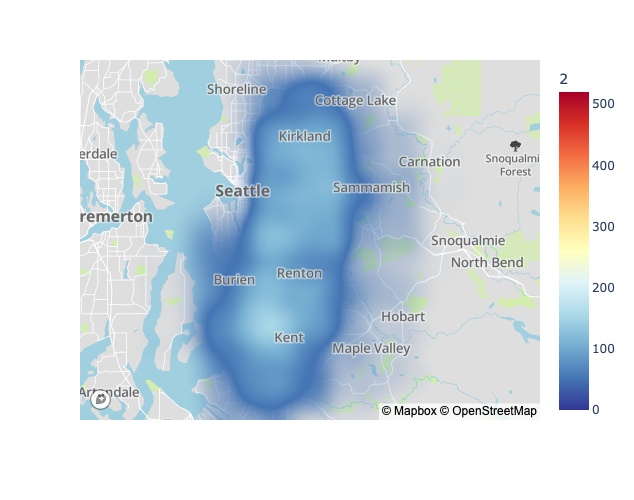

In [35]:
plotly_heat_map(path = path_no_inter, day = 50)

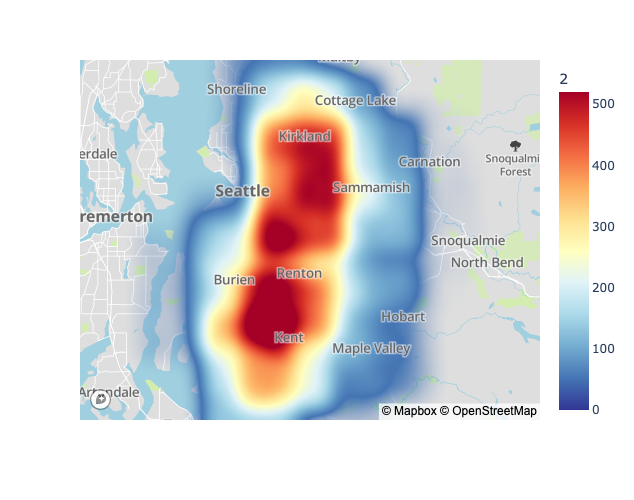

In [36]:
plotly_heat_map(path = path_no_inter, day = 70)

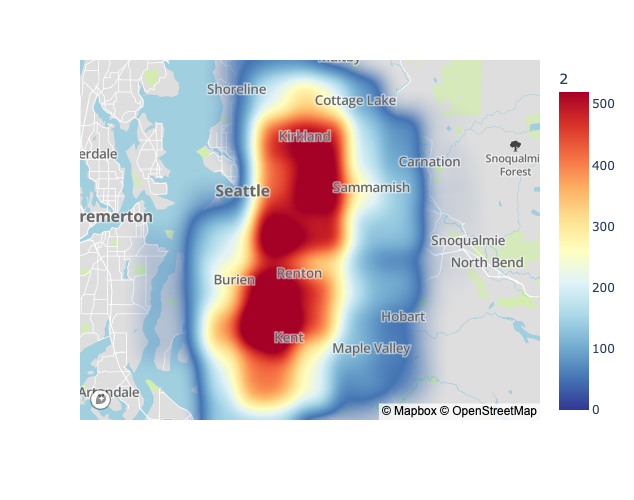

In [37]:
plotly_heat_map(path = path_no_inter, day = 120)

In [240]:
# day_map(path = path_no_inter)

## ct

In [38]:
path_vacc_ct = 'VACC_CT_full_20231006T053132.350476/0_agents_stages_summary_seed_1234.csv'

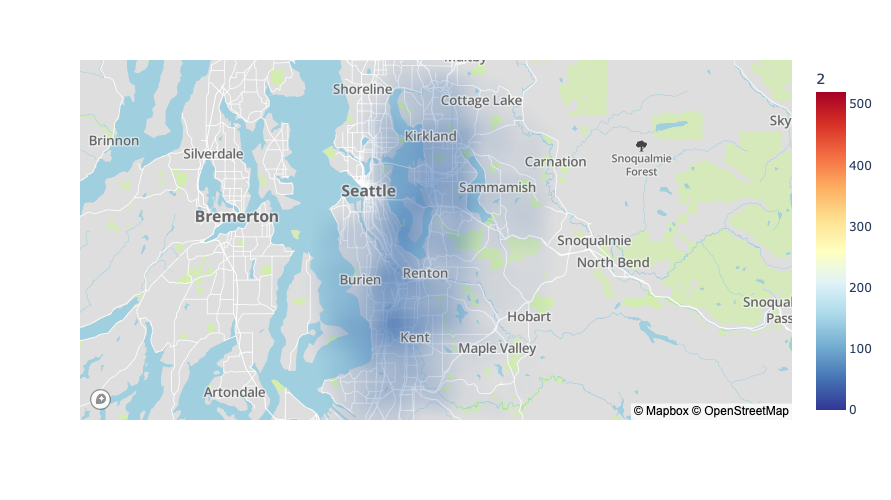

In [42]:
plotly_heat_map(path = path_vacc_ct, day = 50)

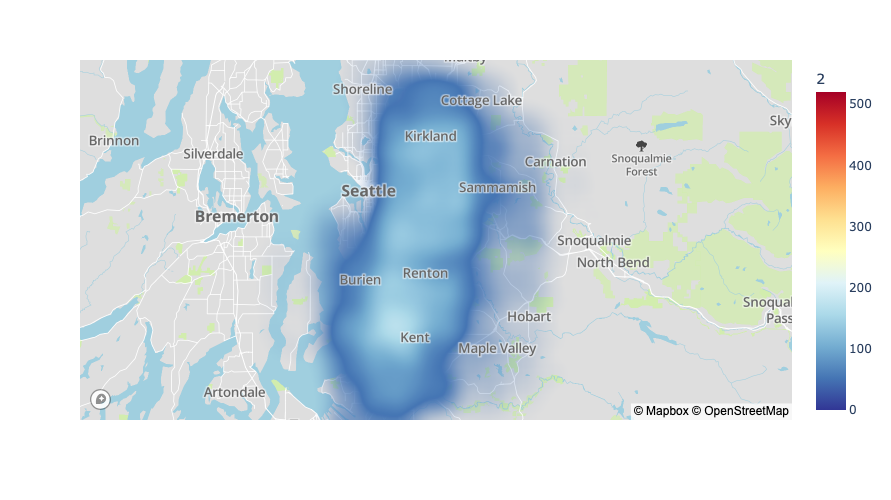

In [43]:
plotly_heat_map(path = path_vacc_ct, day = 70)

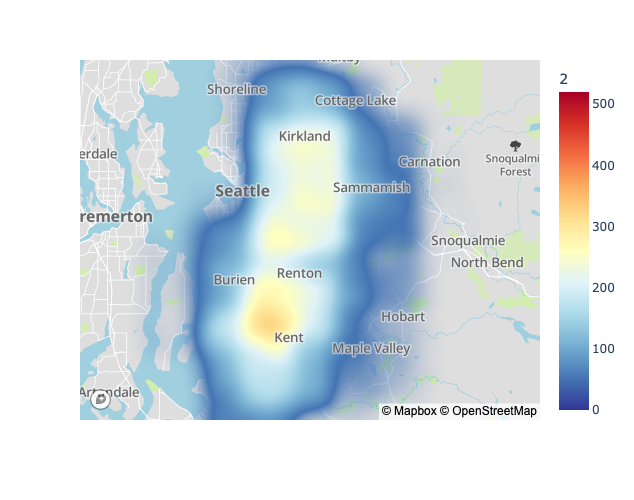

In [41]:
plotly_heat_map(path = path_vacc_ct, day = 120)

In [25]:
# day_map(path = path_dct)